<a href="https://colab.research.google.com/github/Rodrigoveloso7/CALCULO-COP-SISTEMA-DE-REFRIGERACAO-REAL/blob/main/C%C3%81LCULO_COP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 49.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
from CoolProp.CoolProp import PropsSI
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
dados = pd.read_excel('/content/cop.xlsx')

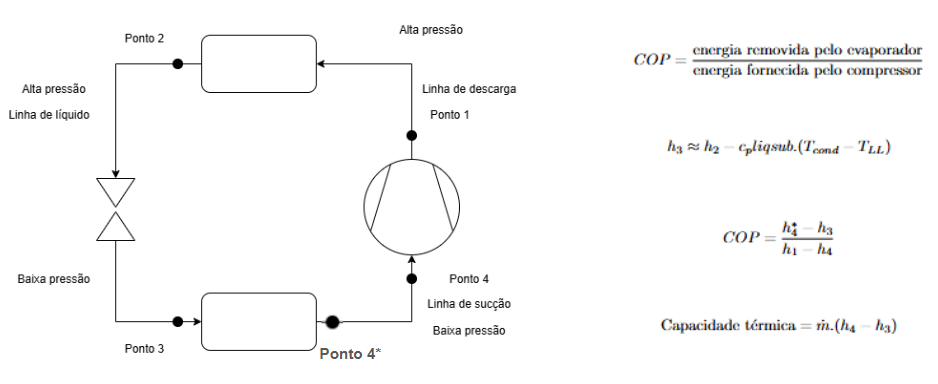

# Parâmetros de projeto

In [ ]:
Fluido = 'R290'
T_amb_alta_temp = 25+273.15
T_amb_baixa_temp = -2+273.15
COP_carnot = (T_amb_baixa_temp)/(T_amb_alta_temp-T_amb_baixa_temp)
COP_carnot

10.042592592592591

#Cálculo COP ponto a ponto

In [ ]:
COP = []
for i in range(0,dados.shape[0]):
  T_cond = PropsSI('T', 'P', dados['Pressão Alta 1'][i] *6894.76,'Q',0, Fluido)
  h4 = PropsSI('H', 'T',dados['LS'][i]+273.15, 'P', dados['Pressão Baixa 1'][i] *6894.76, Fluido)
  h3 = PropsSI('H', 'P', dados['Pressão Alta 1'][i] *6894.76,'Q',0, Fluido) - PropsSI('C', 'P', dados['Pressão Alta 1'][i] *6894.76,'Q',0, Fluido)*(T_cond-(dados['LS'][i]+273.15))
  h1 = PropsSI('H', 'T',dados['LD'][i]+273.15, 'P', dados['Pressão Alta 1'][i] *6894.76, Fluido)
  h4_estrela = PropsSI('H','T',(dados['SEVA'][i])+273.15,'P', (dados['Pressão Baixa 1'][i])*6894.76,Fluido)
  #h3 é a entalpia na entrada do evaporador que é igual h2, considerando expansão isentalpica
  COP.append(((h4_estrela-h3)/(h1-h4)))
desvio_padrao = np.std(COP)

In [ ]:
dados

,Variável,Pressão Baixa 1,Pressão Alta 1,LD,LL,LS,SEVA
0,2024-04-01 09:45:00,39,132,69.0,21.4,9.0,9.0
1,2024-04-01 10:00:00,33,131,73.8,21.6,5.0,5.0
2,2024-04-01 10:15:00,26,130,74.6,21.5,1.2,1.2
3,2024-04-01 10:30:00,5,119,52.0,21.1,-1.8,-1.8
4,2024-04-01 10:45:00,24,130,71.7,21.8,-2.4,-2.4
5,2024-04-01 11:00:00,18,126,71.6,21.8,-4.2,-4.2
6,2024-04-01 11:15:00,17,128,72.0,22.2,-5.5,-5.5
7,2024-04-01 11:30:00,15,128,71.2,22.5,-6.5,-6.5
8,2024-04-01 11:45:00,16,128,70.8,22.4,-6.7,-6.7
9,2024-04-01 12:00:00,16,130,73.7,22.7,-7.5,-7.5


In [ ]:
dados['COP'] = COP
dados_tratados = dados.copy()
dados_tratados = dados_tratados[(dados_tratados['COP'] > 0) & (dados_tratados['COP'] < COP_carnot)].reset_index(drop=True)
dados_tratados

,Variável,Pressão Baixa 1,Pressão Alta 1,LD,LL,LS,SEVA,COP
0,2024-04-01 09:45:00,39,132,69.0,21.4,9.0,9.0,4.104148
1,2024-04-01 10:00:00,33,131,73.8,21.6,5.0,5.0,3.578695
2,2024-04-01 10:15:00,26,130,74.6,21.5,1.2,1.2,3.432003
3,2024-04-01 10:30:00,5,119,52.0,21.1,-1.8,-1.8,5.680981
4,2024-04-01 10:45:00,24,130,71.7,21.8,-2.4,-2.4,3.489592
5,2024-04-01 11:00:00,18,126,71.6,21.8,-4.2,-4.2,3.462894
6,2024-04-01 11:15:00,17,128,72.0,22.2,-5.5,-5.5,3.411912
7,2024-04-01 11:30:00,15,128,71.2,22.5,-6.5,-6.5,3.442740
8,2024-04-01 11:45:00,16,128,70.8,22.4,-6.7,-6.7,3.449404
9,2024-04-01 12:00:00,16,130,73.7,22.7,-7.5,-7.5,3.267603


# Cálculo COP pela mediana


In [ ]:
T_cond = PropsSI('T', 'P', np.median(dados['Pressão Alta 1']) *6894.76,'Q',0, Fluido)
h4 = PropsSI('H', 'T',np.median(dados['LS'])+273.15, 'P', np.median(dados['Pressão Baixa 1']) *6894.76, Fluido)
h3 = PropsSI('H', 'P', np.median(dados['Pressão Alta 1']) *6894.76,'Q',0, Fluido) - PropsSI('C', 'P', np.median(dados['Pressão Alta 1']) *6894.76,'Q',0, Fluido)*(T_cond-(np.median(dados['LL'])+273.15))
h1 = PropsSI('H', 'T',np.median(dados['LD'])+273.15, 'P', np.median(dados['Pressão Alta 1']) *6894.76, Fluido)
h4_estrela = PropsSI('H','T',np.median(dados['SEVA'])+273.15,'P', np.median(dados['Pressão Baixa 1'])*6894.76,Fluido)
#h3 é a entalpia na entrada do evaporador que é igual h2, considerando expansão isentalpica
# print('h4 ',h4)
# print('h3 ',h3)
# print('h1 ',h1)
# COP_mediana = (((h4_estrela-h3)/(h1-h4)))
print('h4-h3',h4-h3)
print('h1-h4',h1-h4)
# print('COP mediana ', COP_mediana)

h4-h3 327120.3854373709
h1-h4 112191.23456183227


# Cálculo COP pela mediana com dados tratados


In [ ]:
mediana_cop = np.median(dados_tratados['COP'])
print(mediana_cop)

3.4561488340373705


# Gráficos de dispersão

Gráfico de dispersão sem tratamento


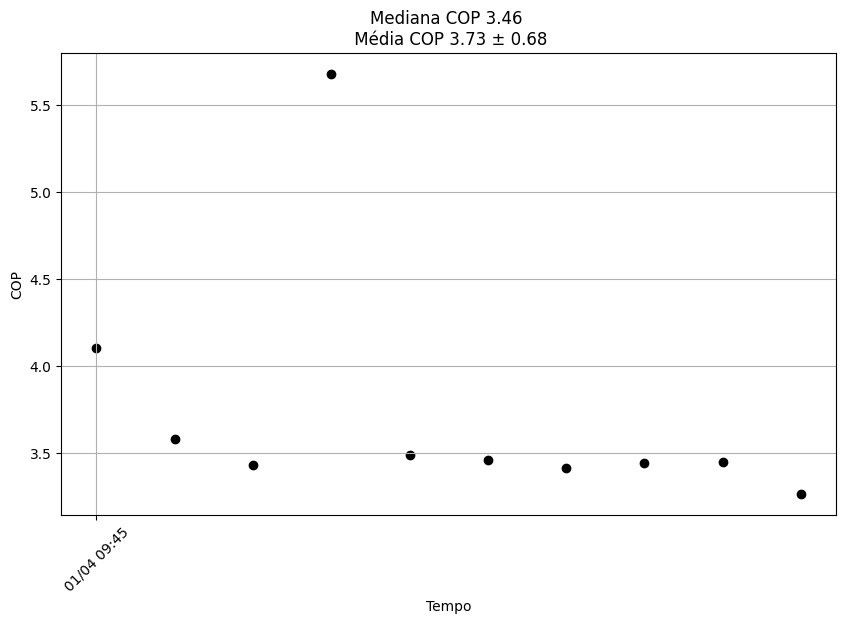

In [ ]:
COP_mediana = np.median(dados['COP'])
COP_media = np.mean(dados['COP'])
desvio_padrao = np.std(dados['COP'])
figura, eixos = plt.subplots(figsize = (10,6))
plt.scatter(pd.to_datetime(dados['Variável']),COP,color='black')
plt.xlabel('Tempo')
plt.ylabel('COP')
eixos.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.xticks(pd.to_datetime(dados['Variável'][::75]))  # Mostra apenas 1 a cada 75 leituras
plt.xticks(rotation=45)
plt.title(f'Mediana COP {COP_mediana:.2f} \n Média COP {COP_media:.2f} ± {desvio_padrao:.2f}')
plt.grid()
#Não utilizável, apenas para conhecimento

In [ ]:
dados_tratados['Variável'].iloc[-1]

Timestamp('2024-04-01 12:00:00')

Gráfico de dispersão com dados tratados

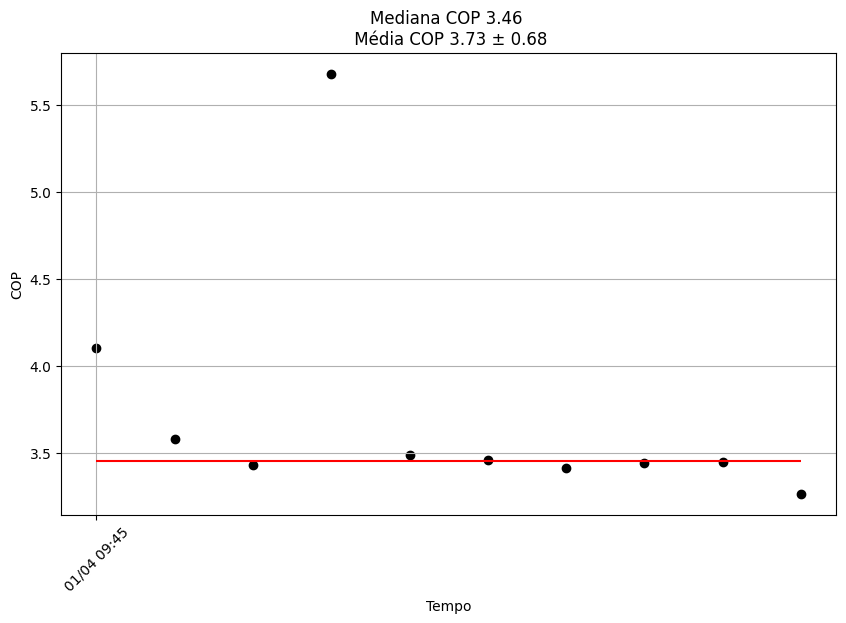

In [ ]:
COP_media_trat = np.mean(dados_tratados['COP'])
desvio_padrao_trat = np.std(dados_tratados['COP'])
figura, eixos = plt.subplots(figsize = (10,6))
plt.scatter(pd.to_datetime(dados_tratados['Variável']),dados_tratados['COP'],color='black')
plt.xlabel('Tempo')
plt.ylabel('COP')
eixos.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.hlines(y=mediana_cop,xmin=pd.to_datetime(dados_tratados['Variável'].iloc[0]),xmax=pd.to_datetime(dados_tratados['Variável'].iloc[-1]),color='red')
plt.xticks(pd.to_datetime(dados_tratados['Variável'][::75]))  # Mostra 1 registro a cada 75 leituras
plt.xticks(rotation=45)
plt.title(f'Mediana COP {mediana_cop:.2f} \n Média COP {COP_media_trat:.2f} ± {desvio_padrao_trat:.2f}')
plt.grid()

# Histogramas

Histograma sem tratamento


Text(0.5, 1.0, 'Mediana COP 3.46 \n Média COP 3.73 ± 0.68')

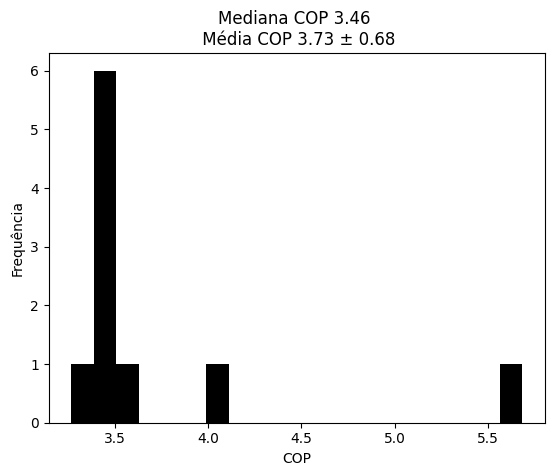

In [ ]:
mediana_cop_nao_tratados = np.median(dados['COP'])
plt.hist(dados['COP'],color='black',bins=20)
plt.xlabel('COP')
plt.ylabel('Frequência')
plt.title(f'Mediana COP {COP_mediana:.2f} \n Média COP {COP_media:.2f} ± {desvio_padrao:.2f}')
#Não utilizável, apenas para conhecimento

Histograma com dados tratados

Text(0.5, 1.0, 'Mediana COP 3.46 \n Média COP 3.73 ± 0.68')

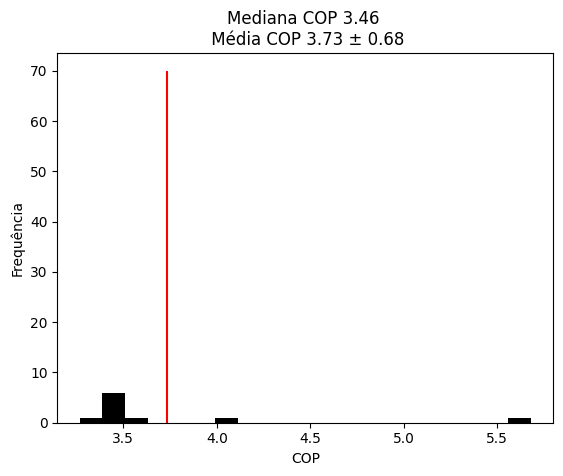

In [ ]:
mediana_cop_tratados = np.median(dados_tratados['COP'])
plt.hist(dados_tratados['COP'],color='black',bins=20)
plt.xlabel('COP')
plt.ylabel('Frequência')
plt.vlines(x = COP_media_trat,ymin=0, ymax=70, color='red')
plt.title(f'Mediana COP {mediana_cop:.2f} \n Média COP {COP_media_trat:.2f} ± {desvio_padrao_trat:.2f}')